In [1]:
# Descargar dataset desde Kaggle
!kaggle datasets download ohinhaque/ocd-patient-dataset-demographics-and-clinical-data

Dataset URL: https://www.kaggle.com/datasets/ohinhaque/ocd-patient-dataset-demographics-and-clinical-data
License(s): other




  0%|          | 0.00/31.1k [00:00<?, ?B/s]
100%|██████████| 31.1k/31.1k [00:00<00:00, 478kB/s]


In [ ]:
# Importar libreria para descomprimir
import zipfile

# Descomprimir archivo
with zipfile.ZipFile('ocd-patient-dataset-demographics-and-clinical-data.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

"rm" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [2]:
# Importar librerias necesarias para el proyecto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Importar la librería fm de matplotlib
from matplotlib import font_manager as fm

# Configurar el estilo de los gráficos ggplot
plt.style.use('ggplot')

# Ruta a la fuente personalizada
font_path = 'KellySlab-Regular.ttf'  # Rura a la fuente personalizada

# Registrar la fuente en matplotlib
font_prop = fm.FontProperties(fname=font_path)
fm.fontManager.addfont(font_path)  # Registrar la fuente en el gestor de fuentes

# Configurar como fuente predeterminada para todos los textos (títulos, etiquetas y números)
plt.rcParams['font.family'] = font_prop.get_name()

In [11]:
# Cargar el dataset
data = pd.read_csv('ocd_patient_dataset.csv')

# Mostrar las primeras 5 filas del dataset
data.head()

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,1018,32,Female,African,Single,Some College,2016-07-15,203,MDD,No,Harm-related,Checking,17,10,Yes,Yes,SNRI
1,2406,69,Male,African,Divorced,Some College,2017-04-28,180,NaN,Yes,Harm-related,Washing,21,25,Yes,Yes,SSRI
2,1188,57,Male,Hispanic,Divorced,College Degree,2018-02-02,173,MDD,No,Contamination,Checking,3,4,No,No,Benzodiazepine
3,6200,27,Female,Hispanic,Married,College Degree,2014-08-25,126,PTSD,Yes,Symmetry,Washing,14,28,Yes,Yes,SSRI
4,5824,56,Female,Hispanic,Married,High School,2022-02-20,168,PTSD,Yes,Hoarding,Ordering,39,18,No,No,NaN


# **Análisis Exploratorio de Datos (EDA)**

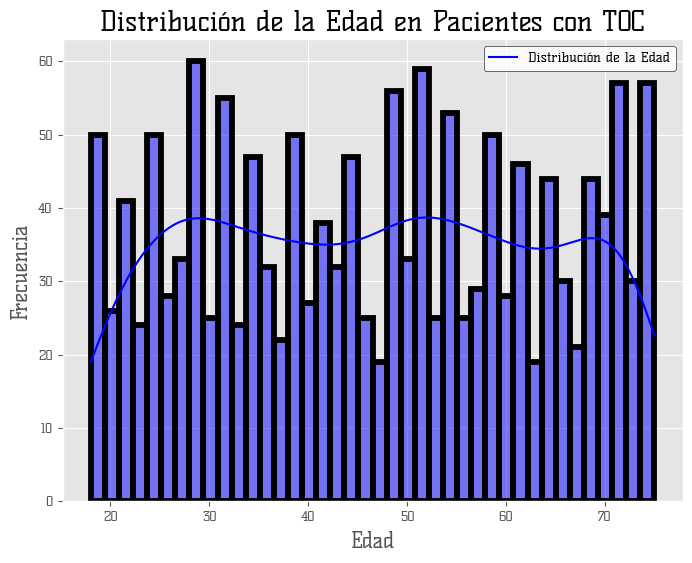

In [23]:
# Graficar la distribución de la edad
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], bins=40, kde=True, color='blue', edgecolor='black', linewidth=4.2)
plt.title('Distribución de la Edad en Pacientes con TOC', fontsize=20)
plt.xlabel('Edad', fontsize=15)
plt.ylabel('Frecuencia', fontsize=15)
plt.legend(['Distribución de la Edad'], loc='best', facecolor='white', edgecolor='black')
plt.show()

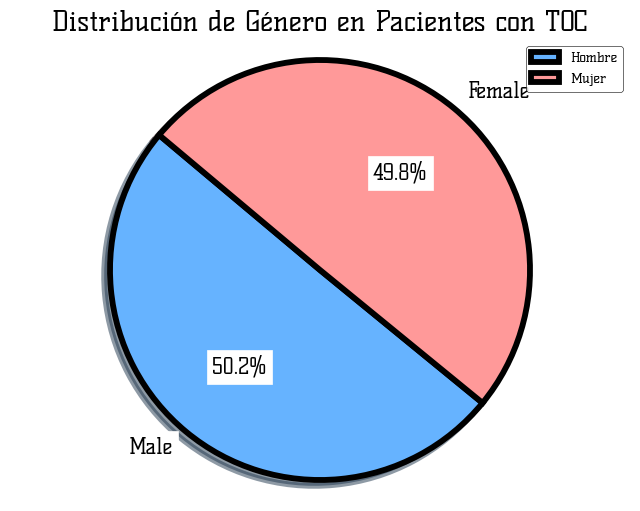

In [ ]:
# Contar la cantidad de cada género
gender_counts = data['Gender'].value_counts()

# Crear la gráfica circular
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999'], shadow=True, textprops={'fontsize': 15, 'fontweight': 'bold', 'backgroundcolor': 'white'}, wedgeprops={'edgecolor': 'black', 'linewidth': 4.2})
plt.title('Distribución de Género en Pacientes con TOC', fontsize=20, fontweight='bold')
plt.axis('equal')  # Asegurar que el gráfico sea un círculo
plt.legend(['Hombre', 'Mujer'], loc='best', facecolor='white', edgecolor='black')
plt.show()

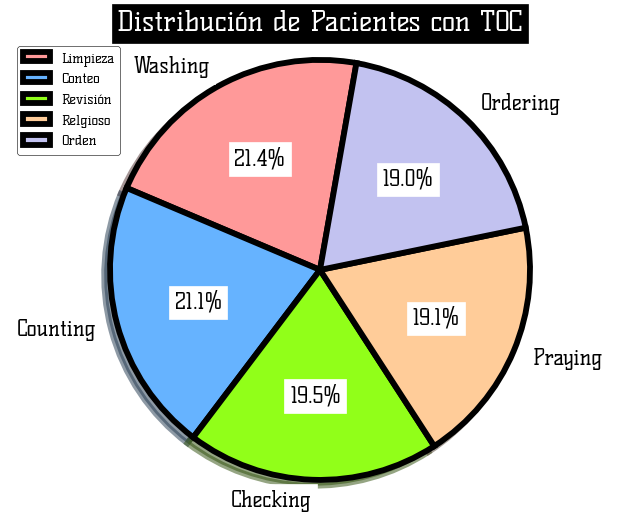

In [57]:
# Contar la cantidad de Compulsion Type
compulsion_counts = data['Compulsion Type'].value_counts()

# Crear la gráfica circular
plt.figure(figsize=(8, 6))
plt.pie(compulsion_counts, labels=compulsion_counts.index, autopct='%1.1f%%', startangle=80, shadow=True, textprops={'fontsize': 15, 'fontweight': 'bold', 'backgroundcolor': 'white'}, wedgeprops={'edgecolor': 'black', 'linewidth': 4.2}, colors=['#ff9999','#66b3ff','#91ff19', '#ffcc99', '#c2c2f0'])
plt.title('Distribución de Pacientes con TOC', fontsize=20, fontweight='bold', backgroundcolor='black', color='white')
plt.axis('equal')  # Asegurar que el gráfico sea un círculo
plt.legend(['Limpieza', 'Conteo', 'Revisión', 'Relgioso', 'Orden'], loc='upper left', facecolor='white', edgecolor='black')
plt.show()

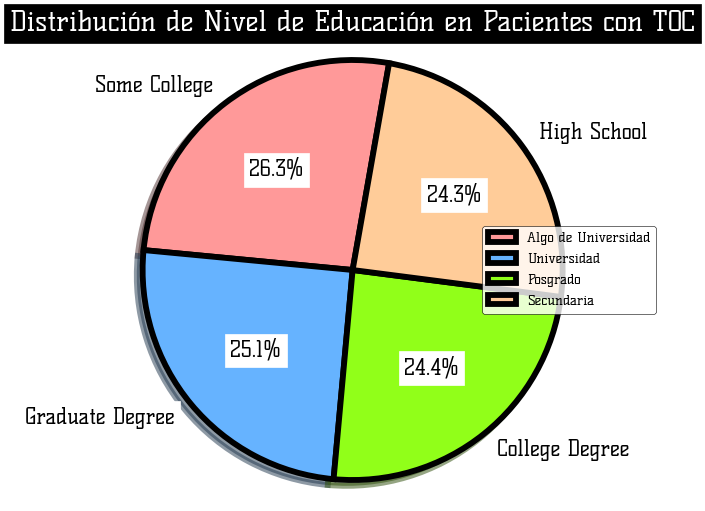

In [67]:
# Grafico circular de Education Leve
education_counts = data['Education Level'].value_counts()

# Crear la gráfica circular
plt.figure(figsize=(8, 6))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=80, shadow=True, textprops={'fontsize': 15, 'fontweight': 'bold', 'backgroundcolor': 'white'}, wedgeprops={'edgecolor': 'black', 'linewidth': 4.2}, colors=['#ff9999','#66b3ff','#91ff19', '#ffcc99'])
plt.title('Distribución de Nivel de Educación en Pacientes con TOC', fontsize=20, fontweight='bold', backgroundcolor='black', color='white')
plt.axis('equal')  # Asegurar que el gráfico sea un círculo
plt.legend(['Algo de Universidad', 'Universidad', 'Posgrado', 'Secundaria'], loc='center right', facecolor='white', edgecolor='black')
plt.show()

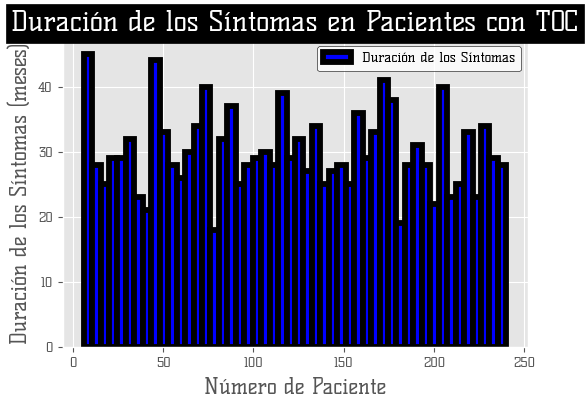

In [74]:
# Grafico de Histograma con puntos de Duration of Symptoms (months)
plt.figure(figsize=(6, 4))
plt.hist(data['Duration of Symptoms (months)'], bins=50, color='blue', edgecolor='black', linewidth=4.2)
plt.title('Duración de los Síntomas en Pacientes con TOC', fontsize=20, fontweight='bold', backgroundcolor='black', color='white')
plt.xlabel('Número de Paciente', fontsize=15)
plt.ylabel('Duración de los Síntomas (meses)', fontsize=15)
plt.legend(['Duración de los Síntomas'], loc='best', facecolor='white', edgecolor='black')
plt.show()

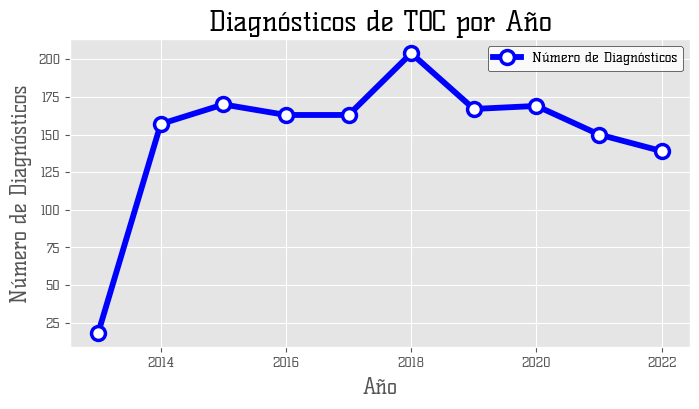

In [89]:
# # Grafico de lineas de OCD Diagnosis Date por año para observar la tendencia de los diagnósticos
data['OCD Diagnosis Date'] = pd.to_datetime(data['OCD Diagnosis Date'])
data['Year'] = data['OCD Diagnosis Date'].dt.year

# Contar la cantidad de diagnósticos por año
diagnosis_counts = data['Year'].value_counts().sort_index()

# Crear la gráfica de línea
plt.figure(figsize=(8, 4))
plt.plot(diagnosis_counts.index, diagnosis_counts.values, marker='o', color='blue', linewidth=4.2, markersize=10, markerfacecolor='white', markeredgewidth=2.5)
plt.title('Diagnósticos de TOC por Año', fontsize=20, fontweight='bold')
plt.xlabel('Año', fontsize=15)
plt.ylabel('Número de Diagnósticos', fontsize=15)
plt.legend(['Número de Diagnósticos'], loc='best', facecolor='white', edgecolor='black')
plt.grid(True)
plt.show()

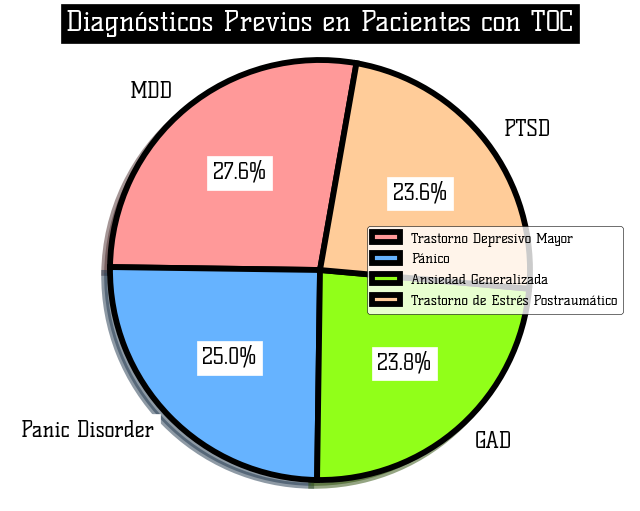

In [ ]:
# Grafico de Previous Diagnoses
previous_diagnoses_counts = data['Previous Diagnoses'].value_counts()

# Crear la gráfica circular
plt.figure(figsize=(8, 6))
plt.pie(previous_diagnoses_counts, labels=previous_diagnoses_counts.index, autopct='%1.1f%%', startangle=80, shadow=True, textprops={'fontsize': 15, 'fontweight': 'bold', 'backgroundcolor': 'white'}, wedgeprops={'edgecolor': 'black', 'linewidth': 4.2}, colors=['#ff9999','#66b3ff','#91ff19', '#ffcc99'])
plt.title('Diagnósticos Previos en Pacientes con TOC', fontsize=20, fontweight='bold', backgroundcolor='black', color='white')
plt.axis('equal')  # Asegurar que el gráfico sea un círculo
plt.legend(['Trastorno Depresivo Mayor', 'Pánico', 'Ansiedad Generalizada', 'Trastorno de Estrés Postraumático'], loc='center right', facecolor='white', edgecolor='black')
plt.show()